
## Fonctions utilitaires

In [1]:

import numpy as np
import random
import matplotlib.pyplot as plt
import time
import sys
import pandas as pd


Distance Minkowski entre un vecteur x et une matrice Y

In [2]:
def minkowski_mat(x, Y, p=2):
    return (np.sum((np.abs(x - Y)) ** p, axis=1)) ** (1.0 / p)

Matrice de confusion


In [3]:
def conf_matrix(testlabels, predlabels):

    n_classes = 19 
    matrix = np.zeros((n_classes,n_classes))
    

    for (test, pred) in zip(testlabels, predlabels):
        matrix[int(test)-1,int(pred)-1]+=1
    return matrix

## NeighborhoodClassifier/KNN Class

In [5]:
#Inspired by labo2
class NeighborhoodClassifier:
    def __init__(self, dist_func=minkowski_mat, k=1):

        self.dist_func = dist_func
        self.k = k

    # The train function for knn 
    def train(self, train_inputs, train_labels):
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        self.n_classes = len(np.unique(train_labels))

    # The prediction function takes as input test_data and returns an array containing the predicted classes. 
    def compute_predictions(self, test_data):
        # Initialization of the count matrix and the predicted classes array
        num_test = test_data.shape[0] #nombre de lignes de test
        counts = np.ones((num_test, self.n_classes)) 
        classes_pred = np.zeros(num_test) 
        # For each test datapoint
        
        for (i, ex) in enumerate(test_data):
  
          
            # i is the row index
            # ex is the i'th row

            # Find the distances to each training set point using dist_func
            
          distances = self.dist_func(ex,self.train_inputs)


          labelToCount = np.array([])
          
          labeltoCount = [self.train_labels[int(x)] for x in np.argsort(distances)[:self.k]]

            
            # Calculate the number of neighbors belonging to each class and write them in counts[i,:]
            
          for label in range(self.n_classes):
            counts[i,label] = labeltoCount.count(label+1)

           
            # From the counts matrix, define classes_pred[i]
            

          classes_pred[i] = int(np.argmax(counts[i]) + 1) 
        return classes_pred.astype('int32')

## Loading DATAS

In [6]:

mnist = pd.read_csv("classification-of-mnist-digits/train.csv")
mnist_labels = pd.read_csv("classification-of-mnist-digits/train_result.csv")
mnist_test = pd.read_csv("classification-of-mnist-digits/test.csv")

With validation set

In [7]:
# load mnist


# Number of classes
n_classes = 19
# Size of training set
n_train = 40000

data = np.array(mnist)[:50000,:-1] 
labels = np.array(mnist_labels)[:50000,1] # labels sans index


# The columns (features) on which to train our model

train_cols = [x for x in range(56*28)]


# Comment to have random (non-deterministic) results
random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Split the data into both sets
train_set = data[train_inds, :]
train_set = train_set[:, train_cols] 
valid_set = data[test_inds, :]
valid_set = valid_set[:, train_cols]

# Separate the test set into inputs and labels
valid_inputs = valid_set
valid_labels = labels[test_inds]
train_inputs = train_set
train_labels = labels[train_inds]



On test set

In [24]:
# load mnist


# Number of classes
n_classes = 19
# Size of training set
n_train=50000


data = np.array(mnist)[:,:-1] 
labels = np.array(mnist_labels)[:,1] # labels sans index
test = np.array(mnist_test)[:,:-1] #On enleve Nan
 
# The columns (features) on which to train our model
# For gridplot to work, len(train_cols) should be 2
train_cols = [x for x in range(56*28)]


# Comment to have random (non-deterministic) results
random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]


# Split the data into both sets
train_set = data[train_inds, :]
test_set = test


# Separate the test set into inputs and labels
test_inputs = test_set
train_inputs = train_set
train_labels = labels[train_inds]

## Initialisation et entraînement des classifieurs


In [ ]:
# Number of neighbors (k) for knn
k = 9

# Create the classifiers
knn = NeighborhoodClassifier(dist_func=minkowski_mat, k=k)


# We train the models
knn.train(train_inputs, train_labels)


# We get predictions
t1 = time.time()
classes_pred_knn = knn.compute_predictions(test_inputs)
t2 = time.time()
print('It took knn ', t2 - t1, ' seconds to get the predictions on ', test_inputs.shape[0],' test set examples')


To csv to submit

In [26]:

indexes = [x for x in range(10000)]
classes = classes_pred_knn

df = pd.DataFrame({
    'Index': indexes,
    'Class': classes})


df.to_csv("classification-of-mnist-digits/predKNN.csv",sep=",",index=False)


## Matrice de confusion et surface de décision

In [9]:
def show_results(model, classes_pred):
    # Confusion Matrix
    confmat = conf_matrix(valid_labels, classes_pred)
    print('The confusion matrix is:')

    # Test error
    sum_preds = np.sum(confmat)
    sum_correct = np.sum(np.diag(confmat))
    print("The test error is ", round(100 * (1.0 - (float(sum_correct) / float(sum_preds))), 2), "%")

show_results(knn, classes_pred_knn)



The confusion matrix is:
The test error is  36.49 %
Too many dimensions ( 1568 ) to print the decision boundary


## Optimisation of hyperparameter K


In [29]:
def get_test_error(k):
   
    knn = NeighborhoodClassifier(dist_func=minkowski_mat, k=k)
    knn.train(train_inputs, train_labels)
    classes_pred_knn = knn.compute_predictions(test_inputs)
    confmat = conf_matrix(test_labels, classes_pred_knn)
    print(k)
    return 1.0 - (float(np.sum(np.diag(confmat))) / float(np.sum(confmat)))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


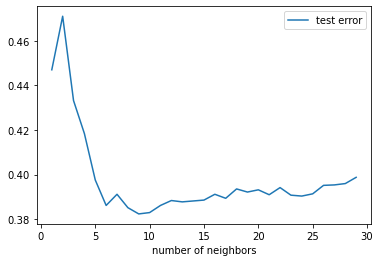

In [30]:
plt.plot(range(1, 30), [get_test_error(k) for k in range(1, 30)], label='test error')
plt.legend()
plt.xlabel('number of neighbors')
plt.show()
